# Libraries and Data

In [1]:
from keras_facenet import FaceNet
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
data=pd.read_csv('E:/Face_2_BMI/Data/all_celeb/data.csv')

In [5]:
data.head(10)
#print(len(data))

,image,height,weight,BMI
0,m_001,1.85,80,23.374726
1,m_002,1.85,81,23.666910
2,m_003,1.84,79,23.334121
3,m_004,1.85,80,23.374726
4,m_005,1.85,80,23.374726
5,m_006,1.86,80,23.124061
6,m_007,1.84,81,23.924858
7,m_008,1.86,80,23.124061
8,m_009,1.85,79,23.082542
9,m_010,1.84,82,24.220227


In [90]:
data_male=data[:408]
data_female=data[408:]

In [91]:
data_male.head(10)
#print(data_male)

,image,height,weight,BMI,class
0,m_001,1.85,80,23.374726,Normal
1,m_002,1.85,81,23.666910,Normal
2,m_003,1.84,79,23.334121,Normal
3,m_004,1.85,80,23.374726,Normal
4,m_005,1.85,80,23.374726,Normal
5,m_006,1.86,80,23.124061,Normal
6,m_007,1.84,81,23.924858,Normal
7,m_008,1.86,80,23.124061,Normal
8,m_009,1.85,79,23.082542,Normal
9,m_010,1.84,82,24.220227,Normal


In [92]:
data_female.head(10)
#print(data_female)

,image,height,weight,BMI,class
408,f_001,1.54,55,23.191095,Normal
409,f_002,1.55,55,22.892820,Normal
410,f_003,1.56,55,22.600263,Normal
411,f_004,1.55,55,22.892820,Normal
412,f_005,1.54,56,23.612751,Normal
413,f_006,1.55,56,23.309053,Normal
414,f_007,1.56,56,23.011177,Normal
415,f_008,1.54,54,22.769438,Normal
416,f_009,1.55,54,22.476587,Normal
417,f_010,1.56,54,22.189349,Normal


# EDA

Female Data Distribution

Text(0.5, 0, 'Height(m)')

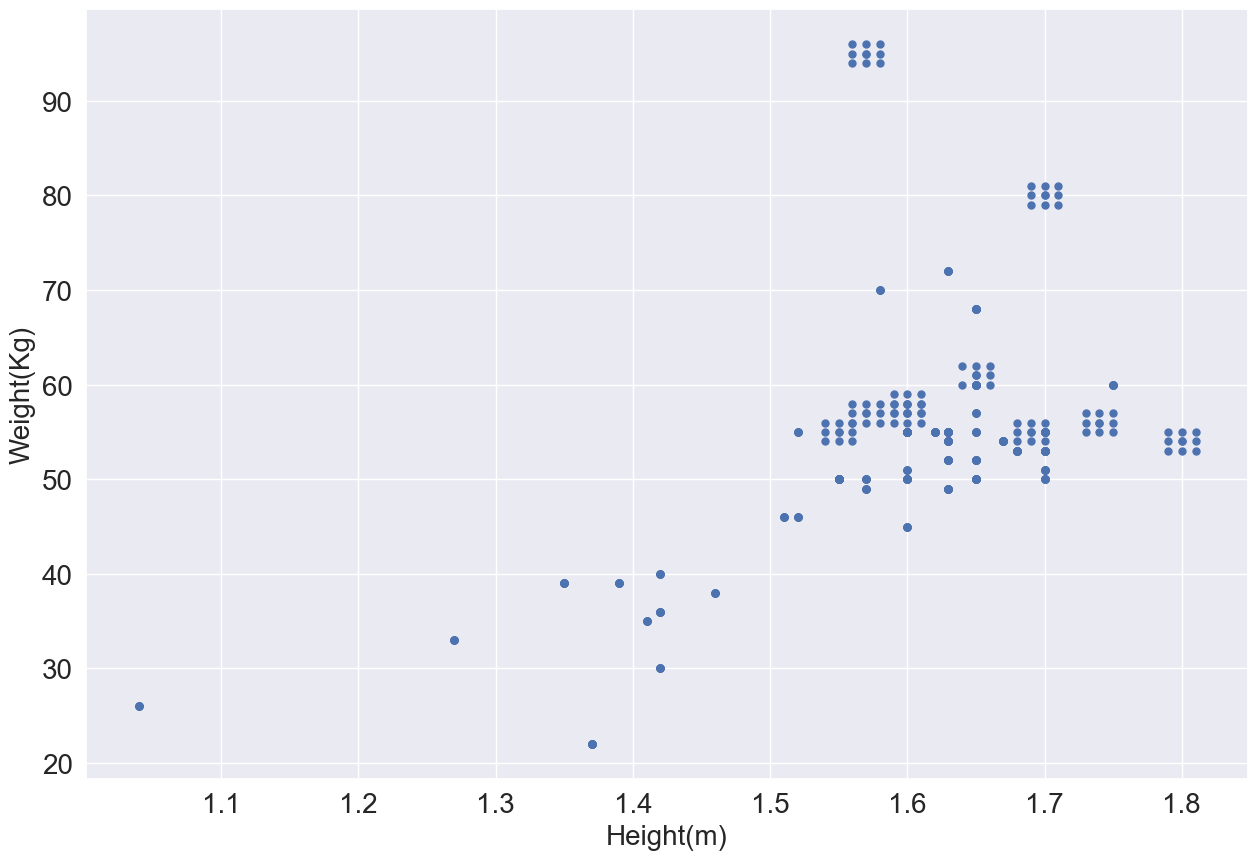

In [9]:
sns.set()
female_plot=data_female.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=5, legend=False,fontsize=20)
female_plot.set_ylabel('Weight(Kg)',fontsize=20)
female_plot.set_xlabel('Height(m)',fontsize=20)

In [10]:
print('Average Height = ' + str(round(data_female['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(data_female['weight'].mean(), 2)) + 'kg')

Average Height = 1.6m, Average Weight = 53.21kg


Male Data Distribution

Text(0.5, 0, 'Height(m)')

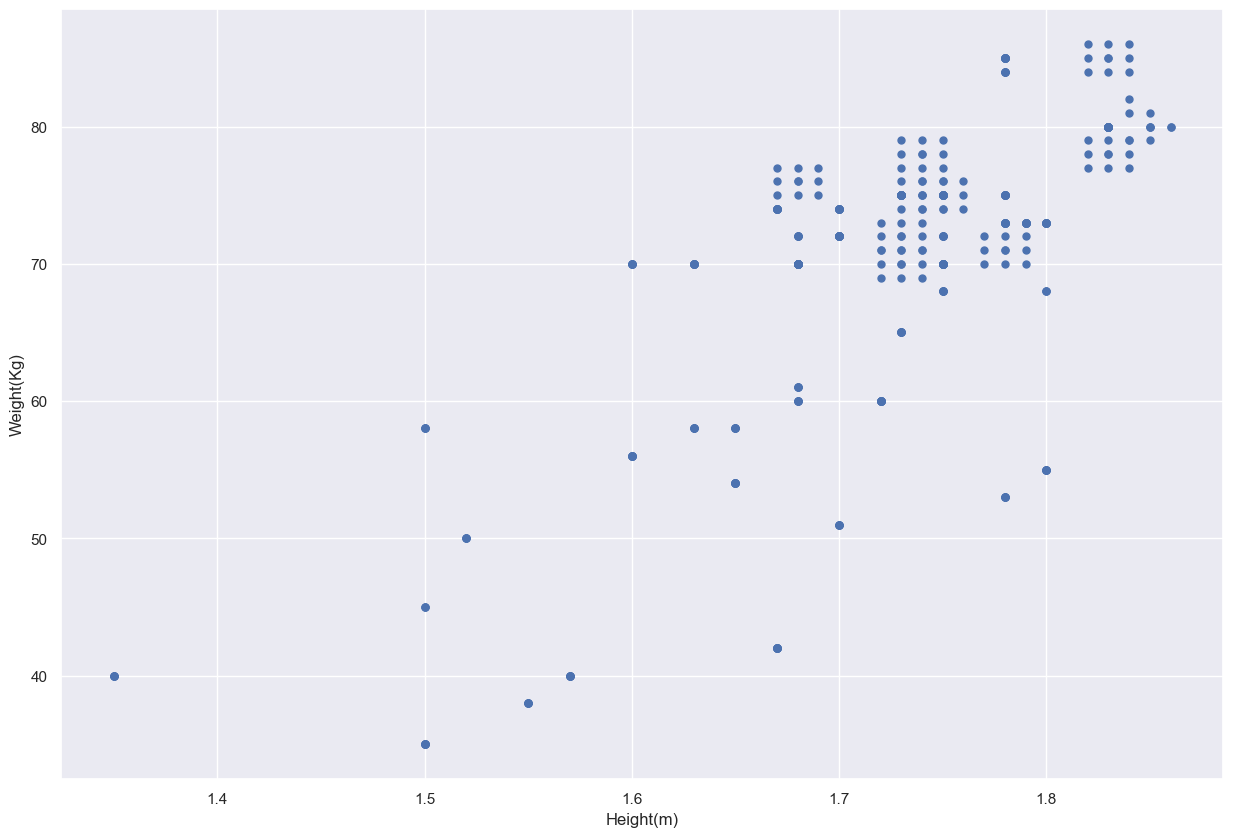

In [11]:
sns.set()
male_plot=data_male.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=5, legend=False)
male_plot.set_ylabel('Weight(Kg)')
male_plot.set_xlabel('Height(m)')

In [12]:
print('Average Height = ' + str(round(data_male['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(data_male['weight'].mean(), 2)) + 'kg')

Average Height = 1.72m, Average Weight = 68.34kg


In [13]:
def bmi_classification(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif (bmi >= 18.5) and (bmi < 25):
        return 'Normal'
    elif (bmi >= 25) and (bmi < 30):
        return 'Overweight'
    elif (bmi >= 30) and (bmi < 35):
        return 'Moderately obese'
    elif (bmi >= 35) and (bmi < 40):
        return 'Severely obese'
    else:
        return 'Very severely obese'

In [14]:
data['class'] = data['BMI'].apply(bmi_classification)
data['class'].value_counts()

Normal            565
Underweight       143
Overweight        128
Severely obese     10
Name: class, dtype: int64

# Feature Extraction

In [94]:
from keras_facenet import FaceNet
import cv2

# Load an image
image = cv2.imread("E:/Face_2_BMI/Data/all_celeb/images/f_001.jpg")
image = cv2.imread("E:/Face_2_BMI/Data/Test/flower.jpg")
# Create a FaceNet object
embedder = FaceNet()

# Extract the face embeddings
detections = embedder.extract(image, threshold=0.95)
print(detections)

# Print the embeddings
for i, detection in enumerate(detections):
    print(f'Embedding {i}: {detection["embedding"]}')


1/1 [==============================] - 0s 27ms/step
[]


In [ ]:
from keras_facenet import FaceNet
import cv2
# Load the Facenet model
#model = FaceNet()

# function to read and preprocess images
def preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (160, 160))
        img = (img / 255.0 - 0.5) * 2.0
        return img
    except Exception as e:
        print(e)


def encode_image(image_path):
    embedder = FaceNet()
    try:
        image = preprocess_image(image_path)
    except FileNotFoundError:
        print("File Not Found at: " + image_path)
        return np.zeros(128).tolist()
    if len(embedder.extract(image_path, threshold=0.95))==0:
        print("No Face Found at: " + image_path)
        return np.zeros(128).tolist()
    else:
        face_encoding=embedder.embeddings([image])
        return face_encoding[0].tolist()

import os
face_data=[]
for image_name in data.image:
    if os.path.exists("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".jpg"):
        face_encoding=encode_image("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".jpg")
        face_data.append(face_encoding)
    elif os.path.exists("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".jpeg"):
        face_encoding=encode_image("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".jpeg")
        face_data.append(face_encoding)
    elif os.path.exists("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".png"):
        face_encoding=encode_image("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".png")
        face_data.append(face_encoding)

print(face_data)
print(len(face_data))

In [ ]:
#print(len(face_data),len(face_data[0]))
with open('readme.txt', 'w') as f:
    for i in range(len(face_data)):
        y = [str(abs(x)) for x in face_data[i]]
        f.write(("  ".join(y)))
        f.write('\n')

In [18]:
import face_recognition
def encode_image(image_path):
    try:
        image=face_recognition.load_image_file(image_path)
    except FileNotFoundError:
        print("File Not Found at: " + image_path)
        return np.zeros(128).tolist()
    face_encoding=face_recognition.face_encodings(image)
    if not face_encoding:
        print("No Face Found at " + image_path)
        return np.zeros(128).tolist()
    return face_encoding[0].tolist()

face_data=[]
#print(data.image)
for image_name in data.image:
    if os.path.exists("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpg"):
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpg")
        face_data.append(face_encoding)
    elif os.path.exists("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpeg"):
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpeg")
        face_data.append(face_encoding)
    elif os.path.exists("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".png"):
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".png")
        face_data.append(face_encoding)

In [19]:
import face_recognition
def encode_image(image_path):
    try:
        image=face_recognition.load_image_file(image_path)
    except FileNotFoundError:
        print("File Not Found at: " + image_path)
        return np.zeros(128).tolist()
    face_encoding=face_recognition.face_encodings(image)
    if not face_encoding:
        print("No Face Found at " + image_path)
        return np.zeros(128).tolist()
    return face_encoding[0].tolist()

In [104]:
#print(len(face_data),len(face_data[0]))
with open('readme.txt', 'w') as f:
    for i in range(len(face_data)):
        y = [str(abs(x)) for x in face_data[i]]
        f.write(("  ".join(y)))
        f.write('\n')

In [21]:
X=np.array(face_data)
y_height=data.height.values
y_weight=data.weight.values
y_BMI=data.BMI.values
#plotX=pd.DataFrame(X)

# Model Creation

Spliting Data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_height_train, y_height_test, y_weight_train, y_weight_test, y_BMI_train, y_BMI_test = train_test_split(X, y_height, y_weight, y_BMI, random_state=1,test_size=0.2)

In [102]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import r2_score
def measure_performance(model, X_test, y_test, predictor_log=True):
    # Make predictions using the testing set
    y_pred = model.predict(X_test)
    y_true = y_test

    if predictor_log:
        y_true = np.log(y_test)
    
    
    errors = abs(y_pred - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Variance score: %.2f' % r2_score(y_true, y_pred))

In [26]:
from sklearn.kernel_ridge import KernelRidge
from sklearn import  linear_model
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import joblib

## Simple Linear Regression

In [37]:
#Height Estimation
model_height = linear_model.LinearRegression()
model_height = model_height.fit(X_train, np.log(y_height_train))
measure_performance(model_height, X_test, y_height_test)

Model Performance
Accuracy = 89.20%.
Variance score: 0.63


In [38]:
#Weight Estimation
model_weight = linear_model.LinearRegression()
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
measure_performance(model_height,X_test,y_weight_test)

Model Performance
Accuracy = 12.36%.
Variance score: -209.86


In [46]:
#BMI Estimation
model_BMI = linear_model.LinearRegression()
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))
measure_performance(model_height,X_test,y_BMI_test)

#saving model
bmi_model = 'E:/Face_2_BMI/models/linear_bmi_predictor.model'
joblib.dump(model_BMI, bmi_model)

Model Performance
Accuracy = 16.33%.
Variance score: -278.98


['E:/Face_2_BMI/models/linear_bmi_predictor.model']

## Ridge Linear Regression

In [74]:
#Estimating Height

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_height = make_pipeline(StandardScaler(with_mean=False), Ridge(fit_intercept=True, alpha=0.0015, random_state=4))
model_height = model_height.fit(X_train, np.log(y_height_train))
measure_performance(model_height, X_test, y_height_test)

Model Performance
Accuracy = 79.79%.
Variance score: 0.63


In [75]:
#Estimating Weight
model_weight = make_pipeline(StandardScaler(with_mean=False), Ridge(fit_intercept=True, alpha=0.0015, random_state=4))
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
measure_performance(model_weight,X_test,y_weight_test)

Model Performance
Accuracy = 88.77%.
Variance score: 0.69


In [76]:
#Estimating BMI
model_BMI = make_pipeline(StandardScaler(with_mean=True), Ridge(fit_intercept=True, alpha=0.0015, random_state=4))
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
measure_performance(model_BMI, X_test, y_BMI_test)

#saving model
bmi_model = 'E:/Face_2_BMI_Estimation_Project/models/ridge_bmi_predictor.model'
joblib.dump(model_BMI, bmi_model)

Model Performance
Accuracy = 88.84%.
Variance score: 0.56


['E:/Face_2_BMI_Estimation_Project/models/ridge_bmi_predictor.model']

## Random Forest Regressor

In [56]:
model_height = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_height = model_height.fit(X_train,np.log(y_height_train))
measure_performance(model_height, X_test, y_height_test)

Model Performance
Accuracy = 79.04%.
Variance score: 0.45


In [57]:
#With Hyperparamter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()

In [84]:
rf_height_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_height_model.fit(X_train,np.log(y_height_train))
measure_performance(rf_height_model, X_test, y_height_test)
joblib.dump(rf_height_model, 'E:/Face_2_BMI/models/rf_height_predictor.model')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Accuracy = 90.13%.
Variance score: 0.73


['E:/Face_2_BMI/models/rf_height_predictor.model']

In [68]:
model_weight = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
measure_performance(model_weight, X_test, y_weight_test)

Model Performance
Accuracy = 90.92%.
Variance score: 0.52


In [87]:
rf_weight_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_weight_model.fit(X_train,np.log(y_weight_train))
measure_performance(rf_weight_model,X_test,y_weight_test)

joblib.dump(rf_weight_model, 'E:/Face_2_BMI/models/rf_weight_predictor.model')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Accuracy = 91.94%.
Variance score: 0.80


['E:/Face_2_BMI/models/rf_weight_predictor.model']

In [69]:
model_BMI = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
measure_performance(model_BMI, X_test, y_BMI_test)

Model Performance
Accuracy = 91.02%.
Variance score: 0.48


In [101]:
rf_BMI_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_BMI_model.fit(X_train,np.log(y_BMI_train))
measure_performance(rf_BMI_model, X_test, y_BMI_test)

bmi_model = 'E:/Face_2_BMI/models/rf_bmi_predictor1.model'

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Accuracy = 91.90%.
Variance score: 0.74


## SVR

In [77]:
from sklearn.svm import SVR

model_height=SVR(kernel='rbf')
model_height=model_height.fit(X_train, np.log(y_height_train) )
measure_performance(model_height, X_test, y_height_test)

Model Performance
Accuracy = 79.17%.
Variance score: 0.49


In [79]:
model_weight=SVR(kernel='rbf')
model_weight=model_weight.fit(X_train, np.log(y_weight_train) )
measure_performance(model_weight, X_test, y_weight_test)

Model Performance
Accuracy = 89.39%.
Variance score: 0.79


In [103]:
model_BMI=SVR(kernel='rbf')
model_BMI=model_BMI.fit(X_train, np.log(y_BMI_train) )
measure_performance(model_BMI, X_test, y_BMI_test)

joblib.dump(model_BMI,'E:/Face_2_BMI/models/svr_bmi_predictor.model')

Model Performance
Accuracy = 89.21%.
Variance score: 0.69


['E:/Face_2_BMI/models/svr_bmi_predictor.model']

In [95]:
#load model from disk
import joblib
height_model = 'E:/Face_2_BMI/models/rf_height_preditor.model'
weight_model = 'E:/Face_2_BMI/models/rf_weight_predictor.model'
bmi_model = 'E:/Face_2_BMI/models/rf_bmi_predictor.model'
height_model = joblib.load(height_model)
weight_model = joblib.load(weight_model)
bmi_model = joblib.load(bmi_model)

In [96]:
def predict_height_width_BMI(test_image,height_model,weight_model,bmi_model):
    test_array = np.expand_dims(np.array(encode_image(test_image)),axis=0)
    height = np.ndarray.item(np.exp(height_model.predict(test_array)))
    weight = np.ndarray.item(np.exp(weight_model.predict(test_array)))
    bmi = np.ndarray.item(np.exp(bmi_model.predict(test_array)))
    return {'height':height,'weight':weight,'bmi':bmi}
    

In [ ]:
'''from PIL import Image

# Load image
image = Image.open('E:/Face_2_BMI/Data/Test/leela.jpeg')

# Resize image
resized_image = image.resize((200,200))

# Display resized image
resized_image.save('E:/Face_2_BMI/Data/Test/leela.jpeg')'''

"from PIL import Image\n\n# Load image\nimage = Image.open('E:/Face_2_BMI/Data/Test/leela.jpeg')\n\n# Resize image\nresized_image = image.resize((200,200))\n\n# Display resized image\nresized_image.save('E:/Face_2_BMI/Data/Test/leela.jpeg')"

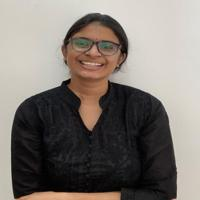

In [97]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/jyothirmai_2.jpeg' 
Image(test_image)

In [98]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.6634954084751306, 'weight': 65.70741427494671, 'bmi': 23.912743905505614}


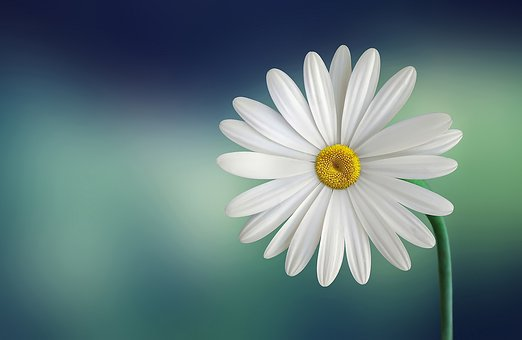

In [99]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/flower.jpg' 
Image(test_image)

In [100]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

No Face Found at E:/Face_2_BMI/Data/Test/flower.jpg
Face Not Found


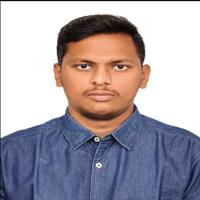

In [ ]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/mano_teja.jpeg' 
Image(test_image)

In [ ]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.7262820282254532, 'weight': 69.17451374165069, 'bmi': 23.13880912235782}


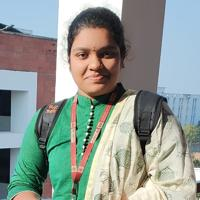

In [ ]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/charitha.jpeg' 
Image(test_image)

In [ ]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.6178840840192577, 'weight': 57.05160587850508, 'bmi': 22.53458717691964}


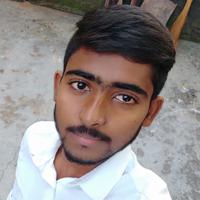

In [ ]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/vamsi.jpeg' 
Image(test_image)

In [ ]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.7028434008860915, 'weight': 67.85868000226021, 'bmi': 23.67146716438817}


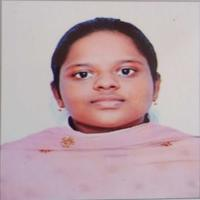

In [ ]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/bhavya.jpeg' 
Image(test_image)

In [ ]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.584543347262988, 'weight': 51.367885302578514, 'bmi': 21.562157973902515}


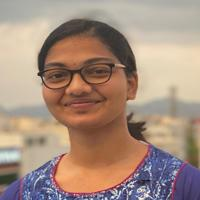

In [ ]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/mythri2.jpeg' 
Image(test_image)

In [ ]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.6178505101864558, 'weight': 57.95716283946932, 'bmi': 22.30740353936443}


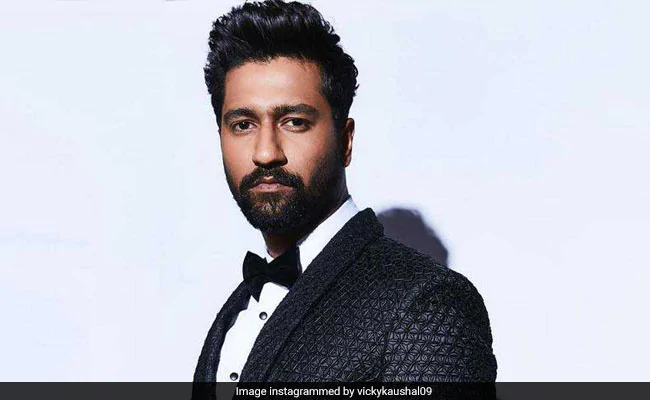

In [ ]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/vikky1.jpg' 
Image(test_image)

In [ ]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.7668435766851032, 'weight': 75.57386082274411, 'bmi': 23.695629146126027}
